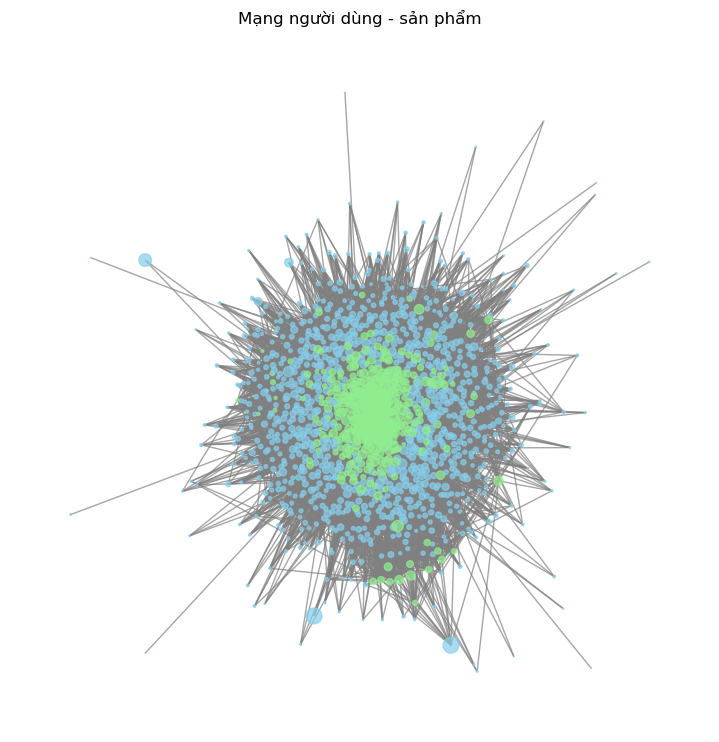

In [ ]:
# ========== PH·∫¶N 1: V·∫º M·∫†NG NG∆Ø·ªúI D√ôNG - S·∫¢N PH·∫®M ==========
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

file_path = "./transactions_top1000cust_top500articles.csv"
df = pd.read_csv(file_path)
df = df[(df['customer_id'].notna()) & df['prod_name'].notna()]

# Gi·ªØ l·∫°i top 50 ng∆∞·ªùi d√πng v√† 50 s·∫£n ph·∫©m
#top_users = df['customer_id'].value_counts().nlargest(500).index
#top_items = df['prod_name'].value_counts().nlargest(500).index
#df_filtered = df[df['customer_id'].isin(top_users) & df['prod_name'].isin(top_items)]
df_filtered = df
# T·∫°o ƒë·ªì th·ªã b·∫±ng NetworkX
G = nx.Graph()
for row in df_filtered.itertuples():
    user = f"user_{row.customer_id}"
    item = f"item_{row.prod_name}"
    G.add_node(user, type='user')
    G.add_node(item, type='item')
    G.add_edge(user, item)

# T√≠nh ƒë·ªô l·ªõn n√∫t
user_counts = df_filtered.groupby("customer_id")["total"].sum().to_dict()
item_counts = df_filtered.groupby("prod_name")["total"].sum().to_dict()
node_sizes = []
node_colors = []
for node in G.nodes():
    if node.startswith("user_"):
        uid = node.replace("user_", "")
        size = user_counts.get(uid, 1)
        node_sizes.append(size * 10)
        node_colors.append("skyblue")
    else:
        iid = node.replace("item_", "")
        size = item_counts.get(iid, 1)
        node_sizes.append(size * 10)
        node_colors.append("lightgreen")

# V·∫Ω m·∫°ng
plt.figure(figsize=(7, 7))
pos = nx.spring_layout(G, k=0.2)
nx.draw(G, pos, node_size=node_sizes, node_color=node_colors, edge_color='gray', alpha=0.7, with_labels=False)
plt.title("M·∫°ng ng∆∞·ªùi d√πng - s·∫£n ph·∫©m")
plt.savefig("mang.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#c√†i c√°c th∆∞ vi·ªán ƒë·ªÉ ch·∫°y GNN ch·ªâ c·∫ßn ch·∫°y l·∫ßn ƒë·∫ßu ti√™n th√¥i
!pip install torch torchvision torchaudio
import torch
print(torch.__version__)
print("‚úÖ PyTorch ƒë√£ ƒë∆∞·ª£c c√†i th√†nh c√¥ng!")
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch-geometric
import torch_geometric
print("‚úÖ torch_geometric ƒë√£ ƒë∆∞·ª£c c√†i th√†nh c√¥ng!")

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 9.2 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 9.5 MB/s eta 0:00:00
2.6.0
‚úÖ PyTorch ƒë√£ ƒë∆∞·ª£c c√†i th√†nh c√¥ng!
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  √ó python setup.py bdist_wheel did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [53 lines of output]
      Compiling without OpenMP...
      Compiling without OpenMP...
      Compiling without OpenMP...
      Compiling without OpenMP...
      running bdist_wheel
      running build
      running build_py
      creating build/lib.macosx-11.1-arm64-cp

In [ ]:
# ========== PH·∫¶N 2: GNN D·ª∞ ƒêO√ÅN M·∫∂T H√ÄNG ==========
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# T·∫°o √°nh x·∫° ID -> s·ªë nguy√™n li√™n t·ª•c
user_ids = df_filtered['customer_id'].unique()
item_ids = df_filtered['prod_name'].unique()
user_map = {uid: i for i, uid in enumerate(user_ids)}
item_map = {iid: i+len(user_ids) for i, iid in enumerate(item_ids)}

# T·∫°o danh s√°ch c·∫°nh
edges = []
for row in df_filtered.itertuples():
    u = user_map[row.customer_id]
    i = item_map[row.prod_name]
    edges.append([u, i])
    edges.append([i, u])

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()

# One-hot vector cho m·ªói node
num_nodes = len(user_map) + len(item_map)
x = torch.eye(num_nodes, dtype=torch.float)
data = Data(x=x, edge_index=edge_index)

# GCN model
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

model = GCN(in_channels=num_nodes, hidden_channels=32)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Negative sampling ƒë∆°n gi·∫£n
def negative_sampling(edge_index, num_nodes, num_samples):
    neg_edges = set()
    edges = set(tuple(e) for e in edge_index.t().tolist())
    while len(neg_edges) < num_samples:
        i = torch.randint(0, num_nodes, (1,)).item()
        j = torch.randint(0, num_nodes, (1,)).item()
        if i != j and (i, j) not in edges and (j, i) not in edges:
            neg_edges.add((i, j))
    return torch.tensor(list(neg_edges), dtype=torch.long).t()

# T·∫°o t·∫≠p hu·∫•n luy·ªán
num_pos = edge_index.size(1)
neg_edge_index = negative_sampling(edge_index, num_nodes, num_pos)

def get_link_labels(pos_edge_index, neg_edge_index):
    return torch.cat([
        torch.ones(pos_edge_index.size(1)),
        torch.zeros(neg_edge_index.size(1))
    ])

def compute_loss(z, pos_edge_index, neg_edge_index):
    total_edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=1)
    z_i = z[total_edge_index[0]]
    z_j = z[total_edge_index[1]]
    pred = (z_i * z_j).sum(dim=1)
    labels = get_link_labels(pos_edge_index, neg_edge_index)
    return F.binary_cross_entropy_with_logits(pred, labels)

# Train model
model.train()
for epoch in range(1, 51):
    optimizer.zero_grad()
    z = model(data.x, edge_index)
    loss = compute_loss(z, edge_index, neg_edge_index)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# D·ª± ƒëo√°n s·∫£n ph·∫©m ti·∫øp theo cho m·ªôt ng∆∞·ªùi d√πng c·ª• th·ªÉ
model.eval()
with torch.no_grad():
    z = model(data.x, edge_index)
    test_user = list(user_map.keys())[0]
    user_idx = user_map[test_user]
    print(f"\nD·ª± ƒëo√°n m·∫∑t h√†ng ti·∫øp theo cho ng∆∞·ªùi d√πng: {test_user}\n")
    scores = []
    for item, item_idx in item_map.items():
        score = (z[user_idx] * z[item_idx]).sum().item()
        scores.append((item, score))

    top_items = sorted(scores, key=lambda x: x[1], reverse=True)[:10]
    for item, score in top_items:
        print(f"{item} | score: {score:.4f}")


Epoch 10, Loss: 0.6667
Epoch 20, Loss: 0.6519
Epoch 30, Loss: 0.6377
Epoch 40, Loss: 0.6307
Epoch 50, Loss: 0.6290

D·ª± ƒëo√°n m·∫∑t h√†ng ti·∫øp theo cho ng∆∞·ªùi d√πng: 08ddd7be3e60252d2cba9dd55297a6ad0bdc1f4e244a16a8ebf61b73c56557c5

Jade HW Skinny Denim TRS | score: 4.2810
Luna skinny RW | score: 3.4500
Perrie Slim Mom Denim TRS | score: 2.6999
Tilly (1) | score: 2.5410
Therese tee | score: 2.4773
Julia RW Skinny Denim TRS | score: 2.4195
Shaping Skinny H.W | score: 2.3919
Push Up Jegging L.W | score: 2.3809
Madison skinny HW (1) | score: 2.2359
Timeless Midrise Brief | score: 2.2032


In [ ]:
# ===== T√çNH C√ÅC CH·ªà S·ªê CENTRALITY =====
deg_centrality = nx.degree_centrality(G)
btw_centrality = nx.betweenness_centrality(G)
eig_centrality = nx.eigenvector_centrality(G, max_iter=500)

# Gom l·∫°i th√†nh DataFrame
centrality_df = pd.DataFrame({
    'node': list(G.nodes()),
    'degree': [deg_centrality[n] for n in G.nodes()],
    'betweenness': [btw_centrality[n] for n in G.nodes()],
    'eigenvector': [eig_centrality[n] for n in G.nodes()],
    'type': ['user' if n.startswith('user_') else 'item' for n in G.nodes()]
})

# ===== TOP 10 THEO T·ª™NG CH·ªà S·ªê - TO√ÄN M·∫†NG =====
print("üîπ Top 10 node theo Degree Centrality:")
print(centrality_df.sort_values(by='degree', ascending=False).head(10)[['node', 'type', 'degree']])

print("\nüîπ Top 10 node theo Betweenness Centrality:")
print(centrality_df.sort_values(by='betweenness', ascending=False).head(10)[['node', 'type', 'betweenness']])

print("\nüîπ Top 10 node theo Eigenvector Centrality:")
print(centrality_df.sort_values(by='eigenvector', ascending=False).head(10)[['node', 'type', 'eigenvector']])

# ===== TOP 10 KH√ÅCH H√ÄNG THEO T·ª™NG CH·ªà S·ªê =====
user_df = centrality_df[centrality_df['type'] == 'user']

print("\nüë§ Top 10 KH√ÅCH H√ÄNG theo Degree Centrality:")
print(user_df.sort_values(by='degree', ascending=False).head(10)[['node', 'degree']])

print("\nüë§ Top 10 KH√ÅCH H√ÄNG theo Betweenness Centrality:")
print(user_df.sort_values(by='betweenness', ascending=False).head(10)[['node', 'betweenness']])

print("\nüë§ Top 10 KH√ÅCH H√ÄNG theo Eigenvector Centrality:")
print(user_df.sort_values(by='eigenvector', ascending=False).head(10)[['node', 'eigenvector']])


üîπ Top 10 node theo Degree Centrality:
                                   node  type    degree
5                   item_Luna skinny RW  item  0.214545
817       item_Jade HW Skinny Denim TRS  item  0.190545
297      item_Perrie Slim Mom Denim TRS  item  0.138182
41                       item_Tilly (1)  item  0.133818
1240                   item_Therese tee  item  0.130909
1092                   item_Lucy blouse  item  0.127273
17              item_Shaping Skinny H.W  item  0.121455
1263  item_Vintage Slim HW ankle consc.  item  0.120727
1017        item_Timeless Midrise Brief  item  0.120000
1109              item_Mom Fit Ultra HW  item  0.113455

üîπ Top 10 node theo Betweenness Centrality:
                                   node  type  betweenness
5                   item_Luna skinny RW  item     0.045153
817       item_Jade HW Skinny Denim TRS  item     0.031287
297      item_Perrie Slim Mom Denim TRS  item     0.018176
41                       item_Tilly (1)  item     0.017162
1

In [ ]:
!pip install python-louvain

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9402 sha256=a0e482aef215ec3e2aeb42fa73352435ecb1746cd3ec7d2b0cb79b0097b34392
  Stored in directory: c:\users\nguye\appdata\local\pip\cache\wheels\40\f1\e3\485b698c520fa0baee1d07897abc7b8d6479b7d199ce96f4af
Successfully built python-louvain


In [ ]:
import community.community_louvain as community_louvain

# Ch·∫°y thu·∫≠t to√°n Louvain ƒë·ªÉ ph√¢n c·ª•m
partition = community_louvain.best_partition(G)

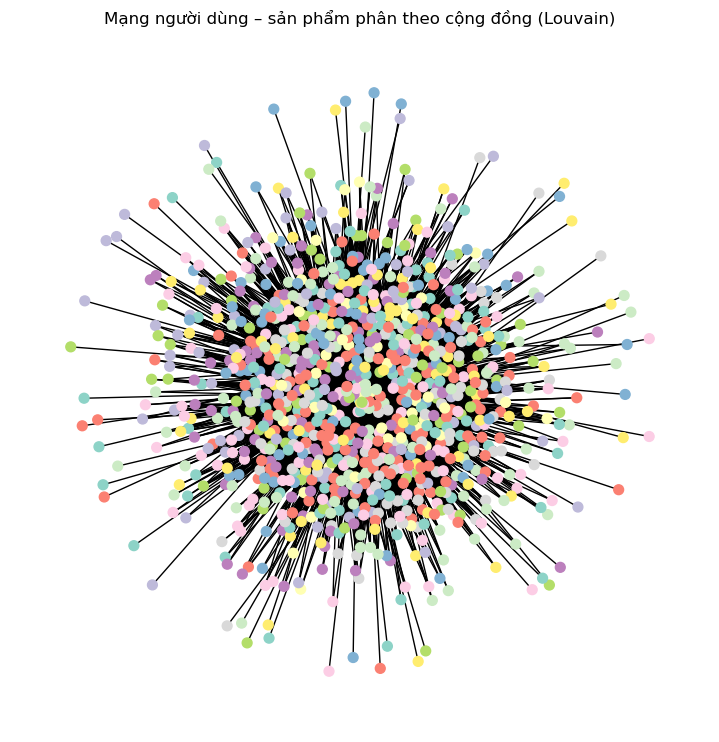

In [ ]:
# ========== PH·∫¶N 1: CLUSTERING (Louvain) C·ªòNG ƒê·ªíNG ==========

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import community.community_louvain as community_louvain

# ƒê·ªçc d·ªØ li·ªáu v√† x·ª≠ l√Ω
#file_path = "./transactions_top1000cust_top500articles.csv"
#df = pd.read_csv(file_path)
#df = df[(df['customer_id'].notna()) & df['prod_name'].notna()]
top_users = df['customer_id'].value_counts().nlargest(1000).index
top_items = df['prod_name'].value_counts().nlargest(50).index
df_filtered = df[df['customer_id'].isin(top_users) & df['prod_name'].isin(top_items)]

# T·∫°o ƒë·ªì th·ªã hai l·ªõp
G = nx.Graph()
for row in df_filtered.itertuples():
    user = f"user_{row.customer_id}"
    item = f"item_{row.prod_name}"
    G.add_node(user, type='user')
    G.add_node(item, type='item')
    G.add_edge(user, item)

# √Ånh x·∫° c·ªông ƒë·ªìng b·∫±ng Louvain
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, name='community')

# Tr·ª±c quan h√≥a m·∫°ng theo c·ªông ƒë·ªìng
colors = [partition[n] for n in G.nodes()]
pos = nx.spring_layout(G, k=0.2)
plt.figure(figsize=(7, 7))
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=50, cmap=plt.cm.Set3)
plt.title("M·∫°ng ng∆∞·ªùi d√πng ‚Äì s·∫£n ph·∫©m ph√¢n theo c·ªông ƒë·ªìng (Louvain)")
plt.savefig("clusters_Louvain.jpg", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# ========== PH·∫¶N 2: PAGERANK TRONG T·ª™NG C·ªòNG ƒê·ªíNG ==========
# T√≠nh PageRank to√†n m·∫°ng
from collections import defaultdict
pagerank = nx.pagerank(G)

# Gom c√°c s·∫£n ph·∫©m theo c·ªông ƒë·ªìng
community_items = defaultdict(list)
for node, group in partition.items():
    if node.startswith("item_"):
        community_items[group].append(node)

# In top s·∫£n ph·∫©m c√≥ PageRank cao nh·∫•t theo t·ª´ng c·ªông ƒë·ªìng
for com, items in community_items.items():
    top_items = sorted(items, key=lambda x: pagerank[x], reverse=True)[:5]
    print(f"\nüéØ C·ªông ƒë·ªìng {com} ‚Äì s·∫£n ph·∫©m hot theo PageRank:")
    for item in top_items:
        print(f" - {item.replace('item_', '')} | PageRank: {pagerank[item]:.4f}")


üéØ C·ªông ƒë·ªìng 6 ‚Äì s·∫£n ph·∫©m hot theo PageRank:
 - Lucy blouse | PageRank: 0.0034
 - Chestnut strap top | PageRank: 0.0027
 - Shaping Skinny R.W. | PageRank: 0.0021
 - Jennifer Top | PageRank: 0.0020
 - Capri blazer | PageRank: 0.0017

üéØ C·ªông ƒë·ªìng 2 ‚Äì s·∫£n ph·∫©m hot theo PageRank:
 - Jade HW Skinny Denim TRS | PageRank: 0.0050
 - Tilly (1) | PageRank: 0.0035
 - Jennifer | PageRank: 0.0030
 - Madison skinny HW (1) | PageRank: 0.0029
 - Julia RW Skinny Denim TRS | PageRank: 0.0026

üéØ C·ªông ƒë·ªìng 0 ‚Äì s·∫£n ph·∫©m hot theo PageRank:
 - Luna skinny RW | PageRank: 0.0057
 - Milk RW slacks | PageRank: 0.0029
 - Bow HW paperwaist | PageRank: 0.0017
 - Fake 1p Leggings | PageRank: 0.0015
 - Noa skinny trouser | PageRank: 0.0012

üéØ C·ªông ƒë·ªìng 5 ‚Äì s·∫£n ph·∫©m hot theo PageRank:
 - Therese tee | PageRank: 0.0035
 - Midnight | PageRank: 0.0028
 - Timeless Sports Top | PageRank: 0.0028
 - The Low Line Highwaist | PageRank: 0.0028
 - Peggy Trouser | PageRank: 

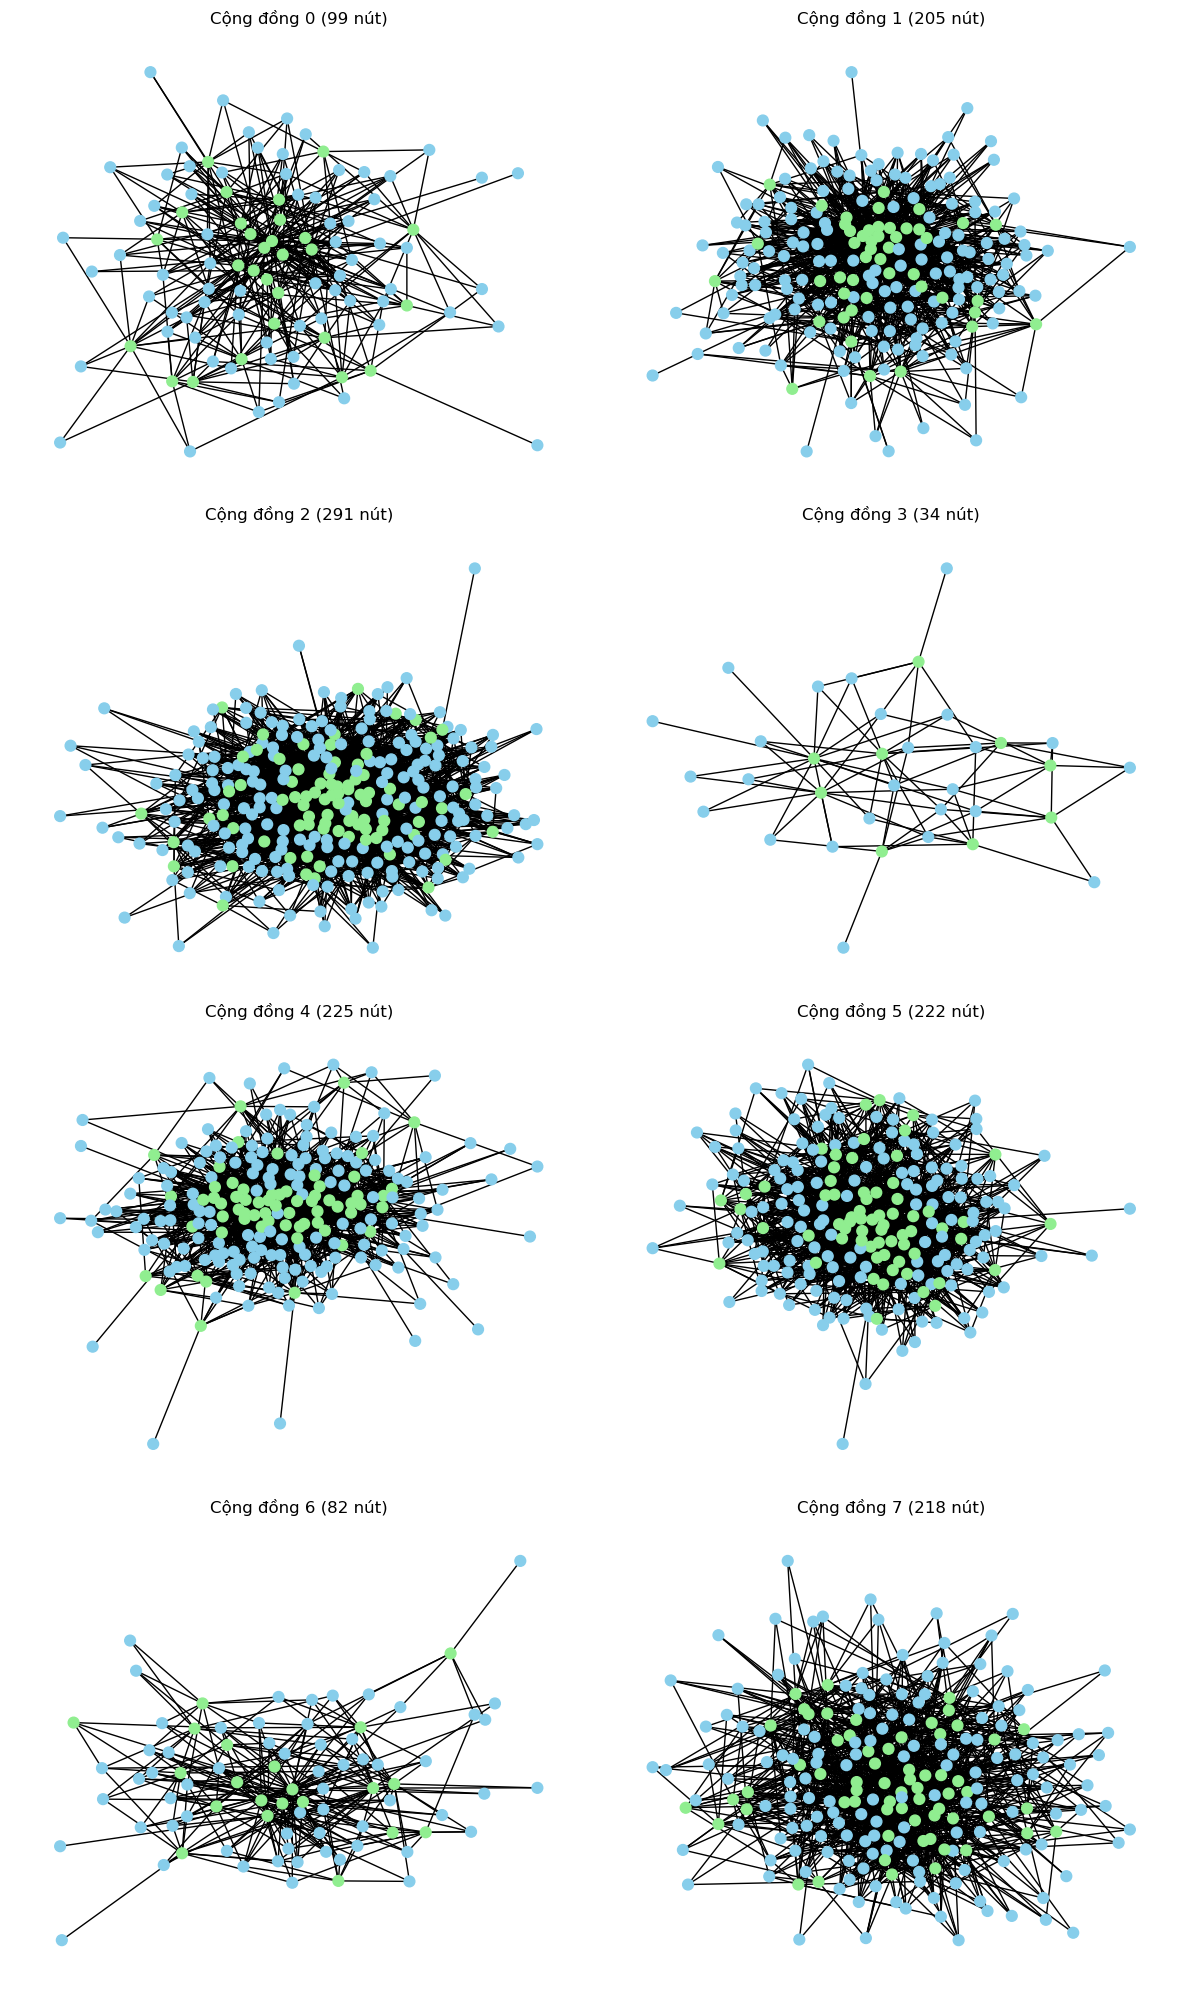

In [ ]:
# ========== PH·∫¶N 3: V·∫º T·ª™NG C·ªòNG ƒê·ªíNG RI√äNG BI·ªÜT ==========
import math

# X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng c·ªông ƒë·ªìng
unique_communities = sorted(set(partition.values()))
num_coms = len(unique_communities)

# T·∫°o figure chia nh·ªè theo subplot
cols = 2  # s·ªë c·ªôt h√¨nh
rows = math.ceil(num_coms / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 5))

# ƒê·∫£m b·∫£o axes l√† d·∫°ng m·∫£ng ph·∫≥ng
axes = axes.flatten()

for i, com in enumerate(unique_communities):
    ax = axes[i]
    sub_nodes = [n for n in G.nodes() if partition[n] == com]
    subgraph = G.subgraph(sub_nodes)
    sub_pos = nx.spring_layout(subgraph, k=0.3)
    node_colors = ['skyblue' if n.startswith("user_") else 'lightgreen' for n in subgraph.nodes()]
    nx.draw(subgraph, sub_pos, ax=ax, node_color=node_colors, with_labels=False, node_size=60)
    ax.set_title(f"C·ªông ƒë·ªìng {com} ({len(subgraph.nodes())} n√∫t)")
    ax.axis('off')

# ·∫®n √¥ tr·ªëng n·∫øu s·ªë subplot l·∫ª
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("clusters.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# ========== G·ª¢I √ù S·∫¢N PH·∫®M THEO C·ª§M NG∆Ø·ªúI D√ôNG (D√ô ƒê√É MUA) ==========
from collections import defaultdict

# Gom user theo c·ªông ƒë·ªìng
community_users = defaultdict(list)
for node, com in partition.items():
    if node.startswith("user_"):
        community_users[com].append(node)

# Gom s·∫£n ph·∫©m theo c·ªông ƒë·ªìng
community_items = defaultdict(list)
for node, com in partition.items():
    if node.startswith("item_"):
        community_items[com].append(node)

# G·ª£i √Ω s·∫£n ph·∫©m PageRank cao trong c·ªông ƒë·ªìng ‚Äì c√≥ th·ªÉ ƒë√£ mua
for com in sorted(community_users.keys()):
    users = community_users[com]
    all_items_in_com = community_items.get(com, [])

    if not all_items_in_com:
        print(f"\n‚ö†Ô∏è Kh√¥ng c√≥ s·∫£n ph·∫©m trong c·ªông ƒë·ªìng {com}")
        continue

    # ∆Øu ti√™n s·∫£n ph·∫©m theo PageRank cao trong c·ª•m
    top_suggestions = sorted(all_items_in_com, key=lambda x: pagerank.get(x, 0), reverse=True)[:5]

    print(f"\nüéØ G·ª£i √Ω s·∫£n ph·∫©m cho c·ªông ƒë·ªìng {com} (theo PageRank):")
    for item in top_suggestions:
        print(f" - {item.replace('item_', '')} | PageRank: {pagerank.get(item):.4f}")


üéØ G·ª£i √Ω s·∫£n ph·∫©m cho c·ªông ƒë·ªìng 0 (theo PageRank):
 - Luna skinny RW | PageRank: 0.0057
 - Milk RW slacks | PageRank: 0.0029
 - Bow HW paperwaist | PageRank: 0.0017
 - Fake 1p Leggings | PageRank: 0.0015
 - Noa skinny trouser | PageRank: 0.0012

üéØ G·ª£i √Ω s·∫£n ph·∫©m cho c·ªông ƒë·ªìng 1 (theo PageRank):
 - Perrie Slim Mom Denim TRS | PageRank: 0.0037
 - Vintage Slim HW ankle consc. | PageRank: 0.0033
 - Timeless Midrise Brief | PageRank: 0.0032
 - Mom Fit Ultra HW | PageRank: 0.0030
 - Harrison short sleeve top CN | PageRank: 0.0022

üéØ G·ª£i √Ω s·∫£n ph·∫©m cho c·ªông ƒë·ªìng 2 (theo PageRank):
 - Jade HW Skinny Denim TRS | PageRank: 0.0050
 - Tilly (1) | PageRank: 0.0035
 - Jennifer | PageRank: 0.0030
 - Madison skinny HW (1) | PageRank: 0.0029
 - Julia RW Skinny Denim TRS | PageRank: 0.0026

üéØ G·ª£i √Ω s·∫£n ph·∫©m cho c·ªông ƒë·ªìng 3 (theo PageRank):
 - CS Paula dress | PageRank: 0.0017
 - Nirvana | PageRank: 0.0017
 - Highwaist 30 den 1p Tights | PageRan